# Project Outline (let's slay/To-Do)

1. Clean training and testing data
  - check-for/drop missing values
  - convert categorical values to appropriate values (one-hot encode maybe)
  - drop values which we think would not have an effect on likelihood of having a stroke (im gonna guess these would be: residence_type and employment_type) or we can keep these if we think they could have an effect
2. Scale the numerical numbers?
  
  I haven't looked at the numbers yet, but if it's like the one in that one homework where the prices for cars were really high and we had to use a logarithmic scale to down-size the numbers, then we should consider doing this

3. Split data? idk im confused why there are 2 data sets

4. Decide on a model to use, either: k nearest neighbor, a linear model, or a decision tree

  I feel like since he gave a linear model as an example we shouldn't do that one? Or if we do make it a little more complex

5. Do the model (way easier said than done lol)
6. Do the paper

**Edit (this is mainly for me bc i get confused easily):**

Basically:
1. Use training data set to train model on
2. Use trained model on testing data set
3. Calculate R2 and RMSE on testing data set

**Cleaning Data**

*Cleaning testing data*

In [ ]:
import numpy as np
import pandas as pd

test_data = pd.read_csv('/content/testing_data.csv')

# Fixing missing values in BMI column
test_data['bmi'].fillna(test_data['bmi'].mean(), inplace=True)

# Standardizing numeric columns using a logarithmic transformation
test_data[['age', 'avg_glucose_level', 'bmi']] = np.log1p(test_data[['age', 'avg_glucose_level', 'bmi']])

# Encoding categorical variables
test_data = pd.get_dummies(test_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Dropping unneccessary columns
test_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

print(test_data)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     4.077537             1              0           4.488187  3.693867   
1     2.197225             0              0           4.717516  2.923162   
2     4.262680             0              0           4.249067  3.608212   
3     3.871201             0              0           5.356350  3.933784   
4     4.317488             1              0           5.331946  4.018183   
...        ...           ...            ...                ...       ...   
1018  4.317488             0              0           4.126812  3.393588   
1019  4.304065             0              0           4.275832  3.566712   
1020  4.060443             0              0           4.469350  3.487375   
1021  4.330733             0              0           4.379524  3.411148   
1022  4.276666             1              0           4.486387  3.393588   

      stroke  gender_Male  ever_married_Yes  work_type_Never_worked  \
0          0    

*Cleaning Training Data*

I just did the same cleaning procedure to this csv

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/content/training_data.csv')

# Fixing missing values in BMI column
train_data['bmi'].fillna(train_data['bmi'].mean(), inplace=True)

# Standardizing numeric columns using a logarithmic transformation
train_data[['age', 'avg_glucose_level', 'bmi']] = np.log1p(train_data[['age', 'avg_glucose_level', 'bmi']])

# Encoding categorical variables
train_data = pd.get_dummies(train_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Dropping unneccessary columns
train_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

print(train_data)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     3.610918             0              0           4.202750  3.502550   
1     3.828641             0              0           4.243626  3.269569   
2     4.077537             0              0           5.147087  3.456317   
3     4.127134             0              0           4.260988  3.335770   
4     4.369448             0              0           4.652626  3.453157   
...        ...           ...            ...                ...       ...   
4082  3.988984             0              0           4.176999  3.749504   
4083  4.343805             1              0           5.274895  3.332205   
4084  4.406719             0              0           4.396053  3.194583   
4085  4.025352             1              1           5.353752  3.713572   
4086  3.871201             0              0           4.476655  3.740048   

      stroke  gender_Male  gender_Other  ever_married_Yes  \
0          0            1 

**Training Data**

In [ ]:
y_train = train_data['stroke']
X_train = train_data.drop('stroke',axis=1)
y_test = test_data['stroke']
X_test = test_data.drop('stroke',axis=1)

X_train['age'] = X_train['age'].fillna(X_train['age'].mean())
X_test['age'] = X_test['age'].fillna(X_test['age'].mean())

**Attempting to Do a Decision Tree**

Accuracy: 0.9120234604105572
Confusion Matrix:
 [[930  43]
 [ 47   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       973
           1       0.07      0.06      0.06        50

    accuracy                           0.91      1023
   macro avg       0.51      0.51      0.51      1023
weighted avg       0.91      0.91      0.91      1023

Root Mean Squared Error (RMSE): 0.2966083943340829
R^2 Score: -0.8924974306269269


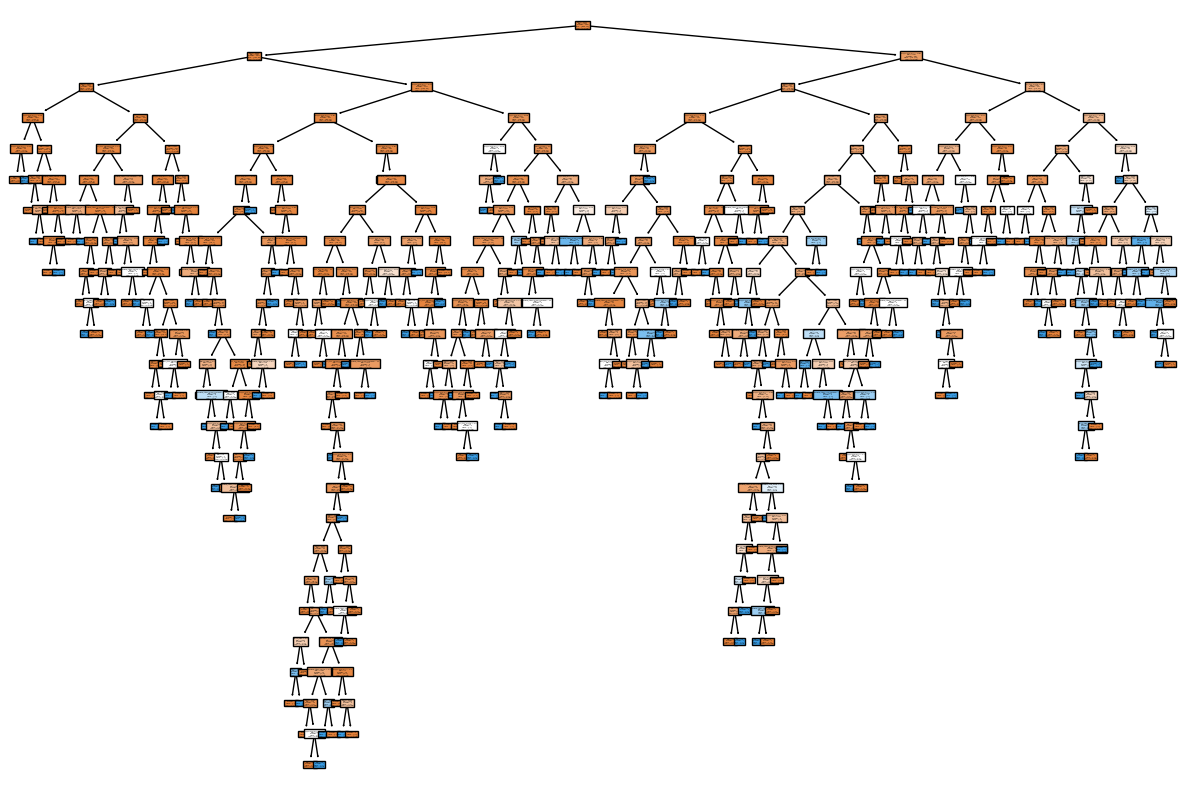

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Separate features and target variable for training data
X_train = train_data.drop(['stroke','gender_Other'], axis=1)
y_train = train_data['stroke']

# Separate features and target variable for testing data
X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Calculate RMSE and R^2 score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display regression metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['No Stroke', 'Stroke'])
plt.show()

Okay so this got a negative R^2 value which is really really bad LOL so i think a decision tree is probably not the best model to do this on. I'll try to do something else

**Attempting to do a KNN Model**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the training dataset
df_train = pd.read_csv('/content/training_data.csv')

df_train = df_train.dropna()

# Separate features and target variable for training data
X_train = df_train.drop('stroke', axis=1)
y_train = df_train['stroke']

# Encoding categorical variables
X_train = pd.get_dummies(X_train, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Load the testing dataset
df_test = pd.read_csv('/content/testing_data.csv')

# Separate features and target variable for testing data
X_test = df_test.drop('stroke', axis=1)
y_test = df_test['stroke']

# Create a k-Nearest Neighbors classifier with k=3 (you can adjust this parameter)
model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


ValueError: ignored

**Attempting to do a Linear Regression Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the training dataset
df_train = pd.read_csv('/content/training_data.csv')

# Drop rows with missing values from the training dataset
df_train = df_train.dropna()

# Separate features and target variable for training data
X_train = df_train.drop('stroke', axis=1)
y_train = df_train['stroke']

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Load the testing dataset
df_test = pd.read_csv('/content/testing_data.csv')

# Drop rows with missing values from the testing dataset
df_test = df_test.dropna()

# Separate features and target variable for testing data
X_test = df_test.drop('stroke', axis=1)
y_test = df_test['stroke']

# One-hot encode categorical variables
X_test = pd.get_dummies(X_test, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Align the feature columns in training and testing datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Vary the maximum depth of the decision tree and compute R2 and RMSE
best_depth = None
best_r2 = -float('inf')
best_rmse = float('inf')

for depth in range(1, 11):  # Vary the depth from 1 to 10
    # Create a decision tree regressor with the current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Compute R2 and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Print or store the results
    print(f"Depth: {depth}, R2: {r2}, RMSE: {rmse}")

    # Update the best results if the current depth performs better
    if r2 > best_r2:
        best_r2 = r2
        best_depth = depth
        best_rmse = rmse

# Print the best results
print(f"Best Depth: {best_depth}, Best R2: {best_r2}, Best RMSE: {best_rmse}")


Depth: 1, R2: 1.0, RMSE: 0.0
Depth: 2, R2: 1.0, RMSE: 0.0
Depth: 3, R2: 1.0, RMSE: 0.0
Depth: 4, R2: 1.0, RMSE: 0.0
Depth: 5, R2: 1.0, RMSE: 0.0
Depth: 6, R2: 1.0, RMSE: 0.0
Depth: 7, R2: 1.0, RMSE: 0.0
Depth: 8, R2: 1.0, RMSE: 0.0
Depth: 9, R2: 1.0, RMSE: 0.0
Depth: 10, R2: 1.0, RMSE: 0.0
Best Depth: 1, Best R2: 1.0, Best RMSE: 0.0


I feel like this is wrong bc there's no way it's a perfect score for all degrees

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Load the training dataset
df_train = pd.read_csv('/content/training_data.csv')

# Drop rows with missing values from the training dataset
df_train = df_train.dropna()

# Separate features and target variable for training data
X_train = df_train.drop('stroke', axis=1)
y_train = df_train['stroke']

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Load the testing dataset
df_test = pd.read_csv('/content/testing_data.csv')

# Drop rows with missing values from the testing dataset
df_test = df_test.dropna()

# Separate features and target variable for testing data
X_test = df_test.drop('stroke', axis=1)
y_test = df_test['stroke']

# One-hot encode categorical variables
X_test = pd.get_dummies(X_test, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Align the feature columns in training and testing datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Vary the maximum depth of the decision tree and compute R2 and RMSE using cross-validation
best_depth = None
best_r2 = -float('inf')
best_rmse = float('inf')

for depth in range(1, 11):  # Vary the depth from 1 to 10
    # Create a decision tree regressor with the current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Use cross-validation to get R2 scores
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

    # Compute the average R2 score
    avg_r2 = r2_scores.mean()
    avg_rmse = rmse_scores.mean()

    # Print or store the results
    print(f"Depth: {depth}, Avg R2: {avg_r2}, Avg RMSE: {avg_rmse}")

    # Update the best results if the current depth performs better
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_depth = depth

# Print the best results
print(f"Best Depth: {best_depth}, Best Avg R2: {best_r2}")


Depth: 1, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 2, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 3, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 4, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 5, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 6, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 7, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 8, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 9, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Depth: 10, Avg R2: 0.7442996742671011, Avg RMSE: 0.09334546478634269
Best Depth: 1, Best Avg R2: 0.7442996742671011


^This works, but have to get it to plot/execute visualization

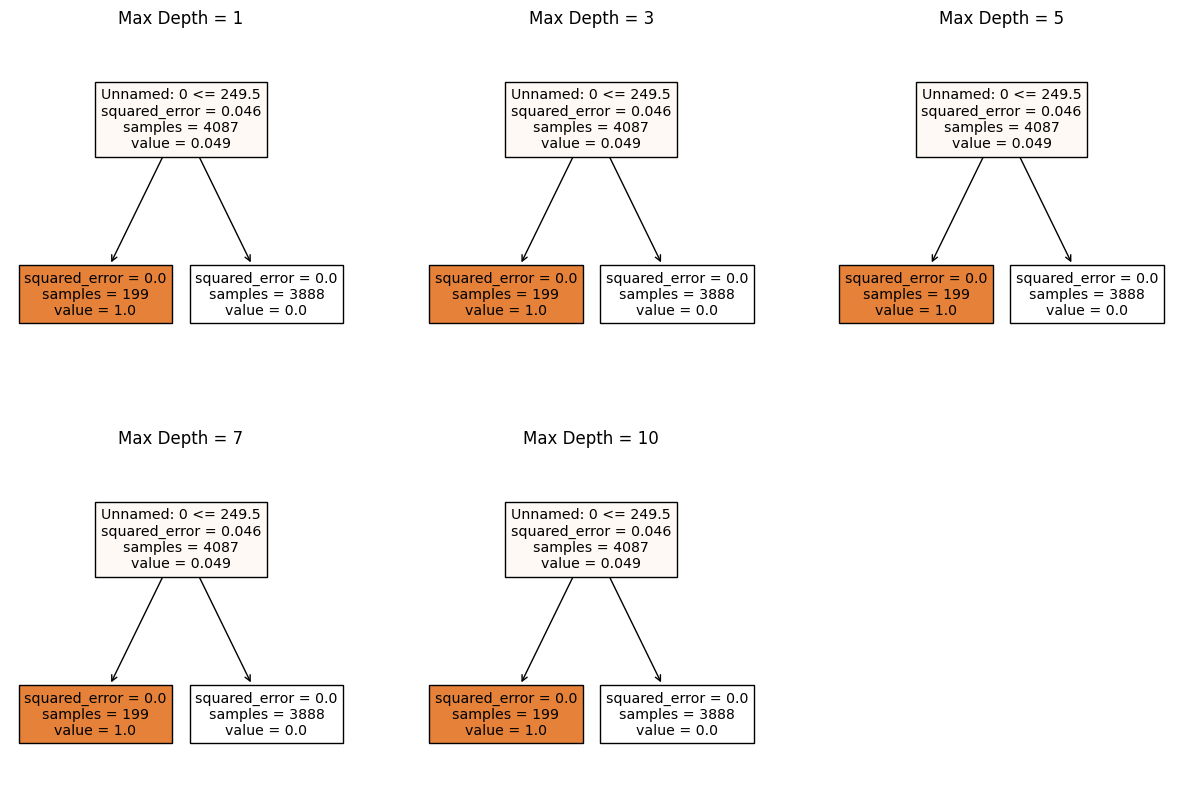

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load your training dataset
df_train = pd.read_csv('/content/training_data.csv')

# Separate features and target variable for training data
X_train = df_train.drop('stroke', axis=1)
y_train = df_train['stroke']

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create transformers for imputation based on data types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to apply transformers to specific column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Plotting
max_depth_values = [1, 3, 5, 7, 10]  # You can adjust the values as needed

plt.figure(figsize=(15, 10))

for depth in max_depth_values:
    # Create and fit DecisionTreeRegressor with varying max_depth
    regression_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])
    regression_tree.fit(X_train, y_train)

    # Plot the decision tree
    try:
        plt.subplot(2, 3, max_depth_values.index(depth) + 1)  # Adjust the subplot layout as needed
        plot_tree(regression_tree['regressor'], filled=True, feature_names=X_train.columns)
        plt.title(f'Max Depth = {depth}')
    except IndexError as e:
        print(f"Error plotting tree with max_depth = {depth}: {e}")

plt.show()
